# Árboles de Decisión (Decision Trees)

- División recursiva: El árbol divide el espacio de entrada en regiones basadas en reglas.
- Impureza: Cómo se decide la mejor división (Gini, entropía para clasificación; varianza para regresión).
- Sobreajuste: Árboles sin poda tienden a sobreajustar.
- Profundidad del árbol: Hiperparámetro clave para controlar la complejidad.
- Visualización de reglas: Cada nodo representa una pregunta; las hojas, decisiones.

## Importar Librerias

In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=100: Genera 100 ejemplos (filas).
- n_features=1: Cada ejemplo tiene 1 sola característica (columna).
- noise=15: Agrega ruido gaussiano (error) al valor de salida y. Esto simula datos reales con imprecisiones.
- random_state=42: Fija la semilla aleatoria para que los datos generados sean siempre los mismos (reproducibilidad).


In [2]:
# Generar 100 muestras de 1 caracteristica. incluir ruido.
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

## Visualización de los datos

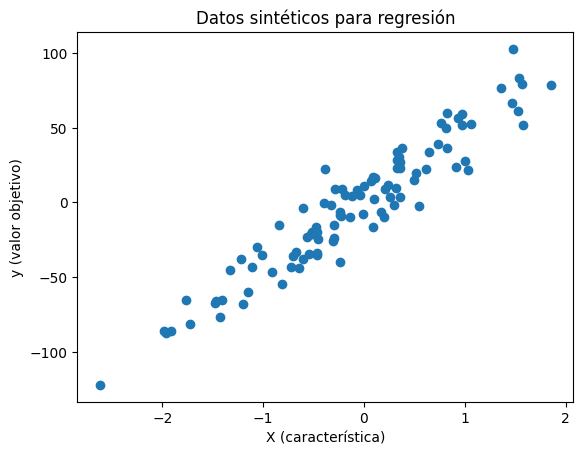

In [3]:
plt.scatter(X, y)
plt.title("Datos sintéticos para regresión")
plt.xlabel("X (característica)")
plt.ylabel("y (valor objetivo)")
plt.show()

# Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer el Pipeline de estandarización y clasificación

In [6]:
pipe = Pipeline([
    ('decisionTree', DecisionTreeRegressor(max_depth=4, random_state=42))
])

## Entrenar el modelo

In [7]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('decisionTree',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

## Evaluar

In [10]:
y_pred = pipe.predict(X_test)
print("Error absoluto medio (MAE):", mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente R2:", r2_score(y_test, y_pred))

Error absoluto medio (MAE): 14.664610518542752
Error cuadrático medio (MSE): 283.1689036841008
Coeficiente R2: 0.8540768673305079


## Visualizar el árbol

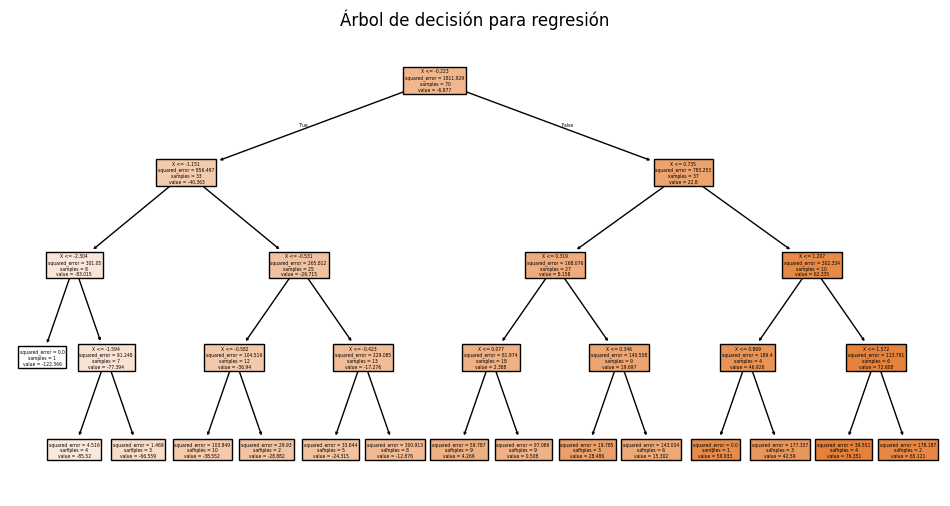

In [11]:
plt.figure(figsize=(12,6))
plot_tree(pipe.named_steps['decisionTree'], feature_names=['X'], filled=True)
plt.title("Árbol de decisión para regresión")
plt.show()

## Visualización de la curva de predicción

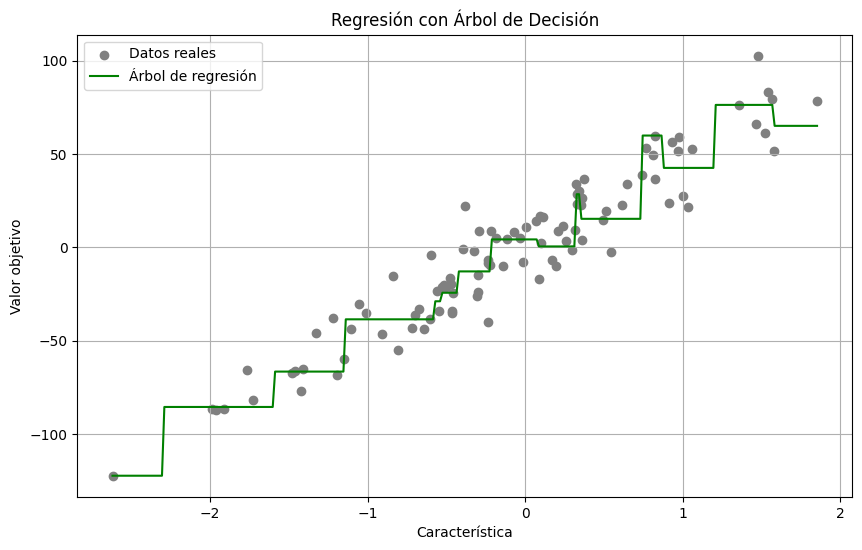

In [13]:
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', label='Datos reales')
plt.plot(X_plot, y_plot, color='green', label='Árbol de regresión')
plt.title("Regresión con Árbol de Decisión")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Visualización del vecindario para un ejemplo.

In [14]:
index = 0 
punto_test = X_test[index].reshape(1, -1)
distancias = np.linalg.norm(X_train - punto_test, axis=1)
indices_vecinos = distancias.argsort()[:5] 
punto_predicho = pipe.predict(X_test[index].reshape(1, -1))[0]

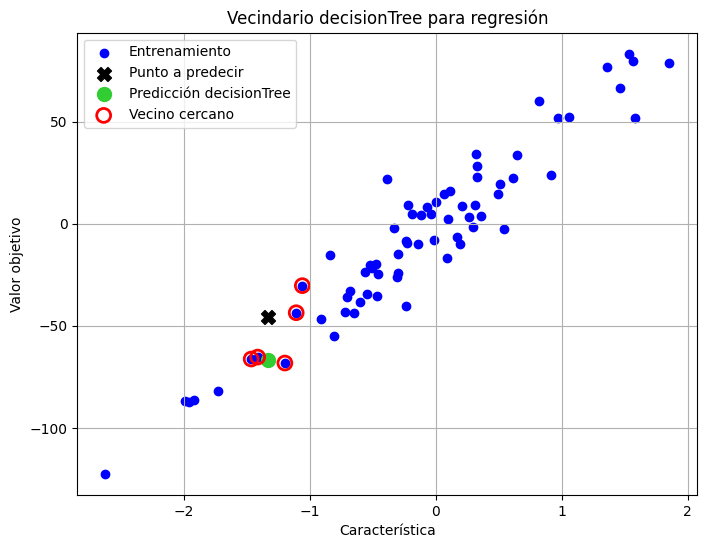

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test[index], y_test[index], color='black', marker='X', s=100, label='Punto a predecir')
plt.scatter(X_test[index], punto_predicho, color='limegreen', marker='o', s=100, label='Predicción decisionTree')
for i in indices_vecinos:
    plt.scatter(X_train[i], y_train[i], edgecolor='red', facecolor='none', s=100, linewidth=2, label='Vecino cercano' if i == indices_vecinos[0] else "")
plt.title("Vecindario decisionTree para regresión")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicios
- Cambiar la profundidad máxima del árbol y observar el sobreajuste.
- Comparar con regresión lineal.

